In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [2]:
df = pd.read_csv("selected_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 7)
(38799, 7)


<Axes: >

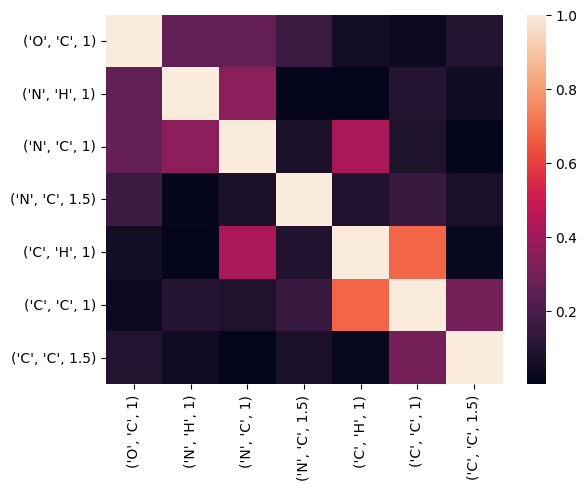

In [3]:
sns.heatmap(df.corr().abs())

In [19]:
X = df.values
model = SOM(m = 1,
            n = 3, 
            dim=X.shape[1],
            max_iter=3000,
            initiate_method="random",
            learning_rate=0.7,
            neighbour_rad=3)
model.fit(X, epoch=5)
model.neurons

[[array([ 7.88153545, 12.48545524, 10.65007488,  0.38354445, 23.79639598,
         20.90251566,  5.81032851])],
 [array([13.67534417,  3.17852354,  6.9091238 ,  9.11909217, 19.31084339,
         15.11975013,  8.09353508])],
 [array([15.05748024, 12.52366812, 16.10157168, 13.00766363, 18.61320197,
         24.21393871,  7.16498497])]]

In [20]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 7)

In [22]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,"('O', 'C', 1)","('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'H', 1)","('C', 'C', 1)","('C', 'C', 1.5)"
0,7.8815,12.4855,10.6501,0.3835,23.7964,20.9025,5.8103
1,13.6753,3.1785,6.9091,9.1191,19.3108,15.1198,8.0935
2,15.0575,12.5237,16.1016,13.0077,18.6132,24.2139,7.1650


In [23]:
cc.round(4).to_excel("clustercenters.xlsx", index=False)
cc.round(4).to_csv("clustercenters.csv", index=False)